In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
path = r"Data\Cleaned_Data.csv"

# Filter methods

In [3]:
ames = pd.read_csv(path)
ames.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,...,0,3,4,1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,1,3,3,0,...,0,3,4,1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,1,0,3,0,...,0,3,4,1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,1,0,3,0,...,0,3,4,1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,1,0,3,0,...,0,3,4,1,0,12,2008,8,4,250000


In [4]:
X = ames[ames.columns[ames.columns != "SalePrice"]]
y = ames["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [5]:
X_train["Class"] = y_train
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Class
64,65,60,3,0.0,9375,1,1,3,3,0,...,0,3,0,1,0,2,2009,8,4,219500
682,683,120,3,0.0,2887,1,1,3,1,0,...,0,3,4,1,0,11,2008,8,4,173000
960,961,20,3,50.0,7207,1,1,0,3,0,...,0,3,4,1,0,2,2010,8,4,116500
1384,1385,50,3,60.0,9060,1,1,3,3,0,...,0,3,2,1,0,10,2009,8,4,105000
1100,1101,30,3,60.0,8400,1,1,3,0,0,...,0,3,4,1,0,1,2009,8,4,60000


In [6]:
t_corr = X_train.corr()["Class"]
corr_columns = list(t_corr[abs(t_corr)>0.5].index)
corr_columns

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'ExterQual',
 'BsmtQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'Class']

In [7]:
if "Class" in corr_columns:
    corr_columns.remove("Class")

In [8]:
X_train_new = X_train[corr_columns]
X_test_new = X_test[corr_columns]

In [9]:
model = LinearRegression()
model.fit(X_train_new, y_train)
corr_score = r2_score(y_test, model.predict(X_test_new))
print(corr_score)

0.722705662820107


In [10]:
model.score(X_test_new, y_test)

0.722705662820107

In [11]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [12]:
X = ames.drop(columns="SalePrice", axis=1)
y = ames["SalePrice"].copy()

In [13]:
test = SelectKBest(score_func=chi2, k=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
X_train.shape

(1022, 80)

In [14]:
test.fit(X_train, y_train)
X_train = test.transform(X_train)
X_train.shape

(1022, 60)

In [15]:
X_test = test.transform(X_test)
X_test.shape

(438, 60)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
chi2_score = model.score(X_test, y_test)
print(chi2_score)

0.7526152480701623


In [17]:
from sklearn.feature_selection import f_regression

In [18]:
X = ames.drop(columns="SalePrice", axis=1)
y = ames["SalePrice"].copy()
test = SelectKBest(score_func=f_regression, k=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
test.fit(X_train, y_train)
X_train = test.transform(X_train)
X_test = test.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)
f_regress_score = model.score(X_test, y_test)
print(f_regress_score)

0.7566701199447428


# Wrapper Method

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor

In [20]:
nof_list=[20,30,40,50,60,70,80]
high_score=0
nof=0

In [21]:
X = ames.drop(columns="SalePrice", axis=1)
y = ames["SalePrice"].copy()

In [22]:
for n in nof_list:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.3)
    model = LinearRegression()
    rfe = RFE(model, n)
    rfe.fit(X_train, y_train)
    X_train_rfe = rfe.transform(X_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe, y_train)
    r2s = model.score(X_test_rfe, y_test)
    if r2s>high_score:
        high_score = r2s
        nof = n
print(high_score, nof)

0.7627843526086595 30


# Embedded methods

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
lasso = Lasso(random_state=0)
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

In [25]:
lasso_score = lasso.score(X_test, y_test)
print(lasso_score)

0.6671828548745306


In [26]:
ridge = Ridge(random_state=0)
ridge.fit(X_train, y_train)
ridge_score = ridge.score(X_test, y_test)
print(ridge_score)

0.67883944067785


# PCA

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [28]:
X = ames.drop(columns="SalePrice", axis=1)
y = ames["SalePrice"].copy()
X.shape, y.shape

((1460, 80), (1460,))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca = PCA(n_components=35, random_state=0)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
model = LinearRegression()
model.fit(X_train_pca, y_train)
pca_score = model.score(X_test_pca, y_test)
print(pca_score)

0.7614586077016585


# Assignment

In [30]:
path = r"Data\Forest Type Cover.csv"

In [31]:
dataset = pd.read_csv(path)
if "Id" in dataset.columns:
    dataset.drop(columns="Id", axis=1, inplace=True)
print(dataset.head())
print(dataset.describe())

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

In [32]:
cols = dataset.columns
size = len(cols)-1
size

54

In [33]:
x = dataset.Cover_Type
y = dataset.drop(columns="Cover_Type", axis=1)

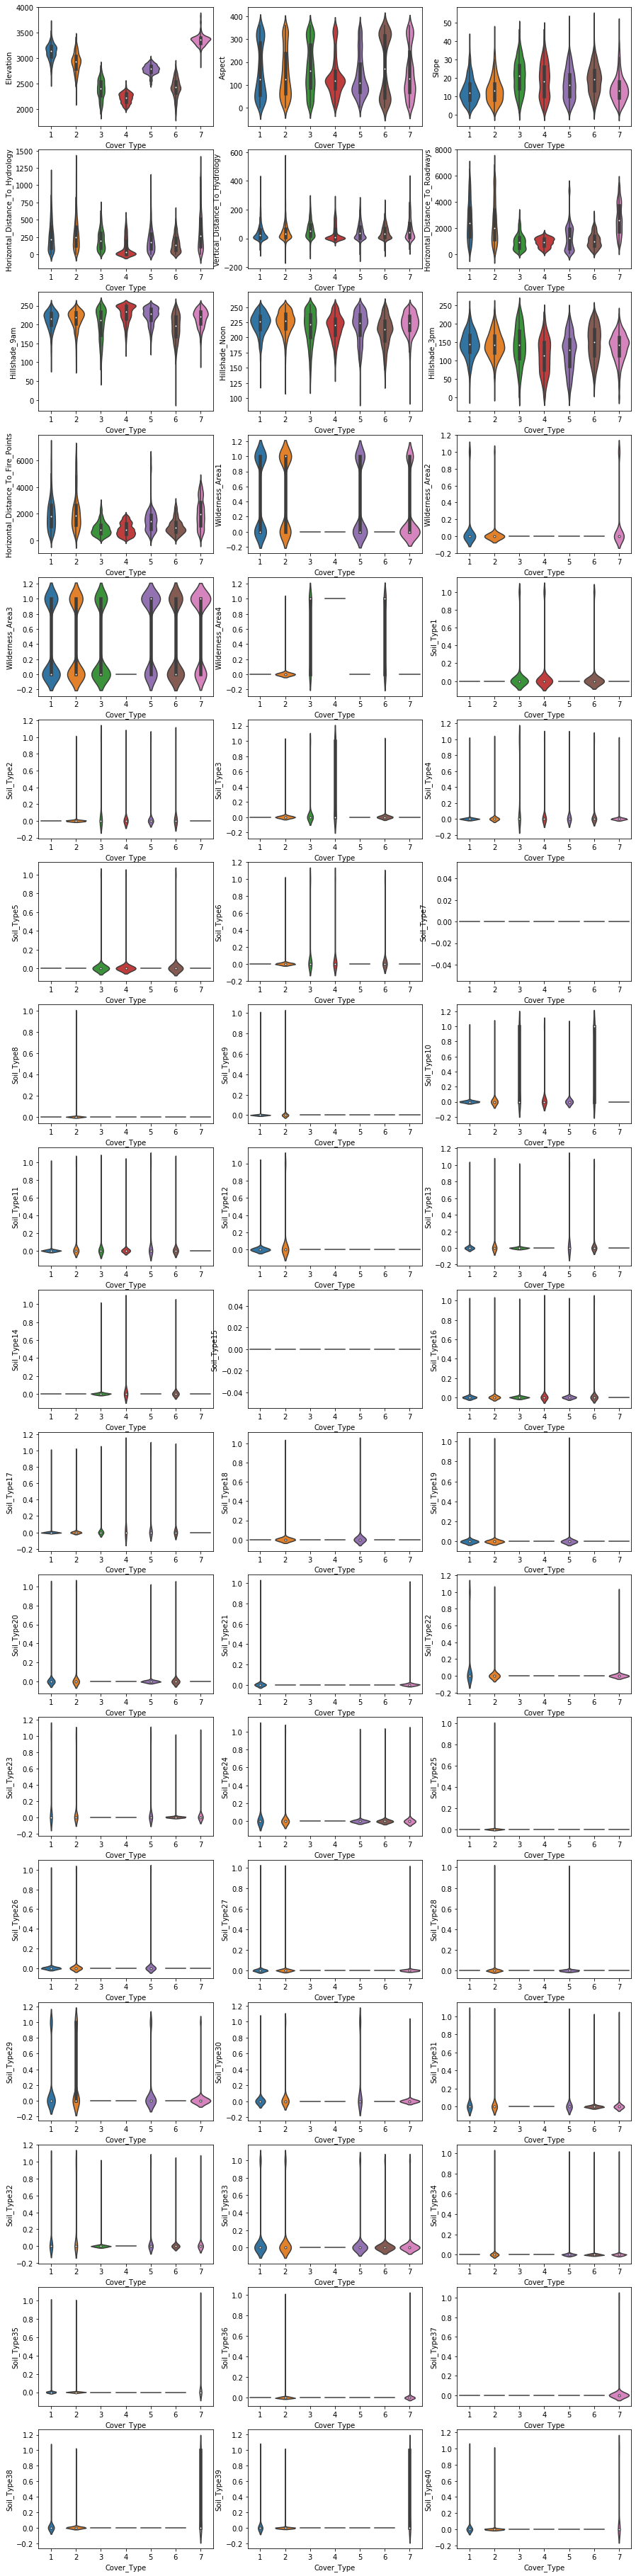

In [34]:
fig, ax = plt.subplots(nrows=18, ncols=3, figsize=[15,66])
for i in range(size):
    sns.violinplot(x,y.iloc[:,i], ax=ax[i//3][i%3])

In [35]:
upper_threshold = 0.5
lower_threshold = -0.5

In [36]:
subset_train = dataset.iloc[:,0:10]
data_corr = subset_train.corr()
data_corr

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Elevation,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,0.443563
Aspect,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,-0.052169
Slope,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,-0.239527
Horizontal_Distance_To_Hydrology,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,0.158817
Vertical_Distance_To_Hydrology,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,-0.015048
Horizontal_Distance_To_Roadways,0.578659,0.066184,-0.277049,0.203397,0.011555,1.000000,-0.003398,0.240684,0.173882,0.486386
Hillshade_9am,0.097900,-0.593997,-0.200072,-0.033803,-0.095930,-0.003398,1.000000,-0.013712,-0.779965,0.078144
Hillshade_Noon,0.215782,0.324912,-0.612613,0.080047,-0.132948,0.240684,-0.013712,1.000000,0.614526,0.122098
Hillshade_3pm,0.089518,0.635022,-0.326887,0.080833,-0.035559,0.173882,-0.779965,0.614526,1.000000,0.043162
Horizontal_Distance_To_Fire_Points,0.443563,-0.052169,-0.239527,0.158817,-0.015048,0.486386,0.078144,0.122098,0.043162,1.000000


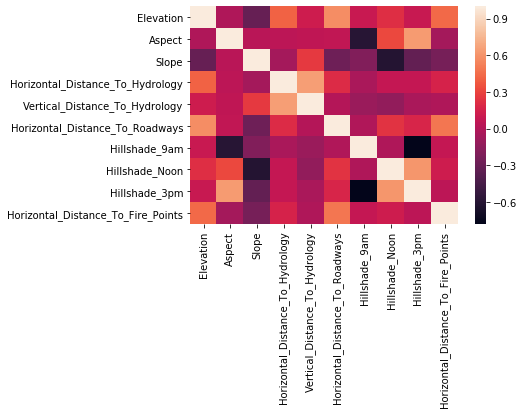

In [37]:
sns.heatmap(data_corr)

In [38]:
correlation = data_corr.unstack().sort_values(kind='quicksort')
correlation

Hillshade_3pm                       Hillshade_9am                        -0.779965
Hillshade_9am                       Hillshade_3pm                        -0.779965
Hillshade_Noon                      Slope                                -0.612613
Slope                               Hillshade_Noon                       -0.612613
Aspect                              Hillshade_9am                        -0.593997
Hillshade_9am                       Aspect                               -0.593997
Slope                               Hillshade_3pm                        -0.326887
Hillshade_3pm                       Slope                                -0.326887
Elevation                           Slope                                -0.312640
Slope                               Elevation                            -0.312640
                                    Horizontal_Distance_To_Roadways      -0.277049
Horizontal_Distance_To_Roadways     Slope                                -0.277049
Hori

In [39]:
corr_var_list = correlation[((correlation>upper_threshold) | (correlation<lower_threshold)) & (correlation!=1)]
corr_var_list

Hillshade_3pm                     Hillshade_9am                      -0.779965
Hillshade_9am                     Hillshade_3pm                      -0.779965
Hillshade_Noon                    Slope                              -0.612613
Slope                             Hillshade_Noon                     -0.612613
Aspect                            Hillshade_9am                      -0.593997
Hillshade_9am                     Aspect                             -0.593997
Horizontal_Distance_To_Roadways   Elevation                           0.578659
Elevation                         Horizontal_Distance_To_Roadways     0.578659
Hillshade_Noon                    Hillshade_3pm                       0.614526
Hillshade_3pm                     Hillshade_Noon                      0.614526
                                  Aspect                              0.635022
Aspect                            Hillshade_3pm                       0.635022
Vertical_Distance_To_Hydrology    Horizontal_Distanc

In [40]:
dataset.drop(columns=['Soil_Type7', 'Soil_Type15'], inplace=True)

In [41]:
X = dataset.drop(columns="Cover_Type", axis=1)
y = dataset.Cover_Type

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
scaler = StandardScaler()

In [44]:
X_train_temp = scaler.fit_transform(X_train)
X_test_temp = scaler.transform(X_test)

In [45]:
# pd.DataFrame(np.concatenate((X_train_temp, X_train), axis=1))
X_train1 = np.concatenate((X_train_temp, X_train), axis=1)
# X_test1 = pd.concat((X_test, pd.DataFrame(X_test_temp)))
X_test1 = np.concatenate((X_test_temp, X_test), axis=1)
X_train1

array([[ 1.47745234,  1.24641777, -0.88630754, ...,  1.        ,
         0.        ,  0.        ],
       [-1.27154731, -0.42495364,  1.12720615, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.48944623,  0.9829951 , -1.24163349, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.83247149,  0.0110563 ,  1.24564814, ...,  0.        ,
         0.        ,  0.        ],
       [-0.42237988, -0.69745984,  2.19318399, ...,  0.        ,
         0.        ,  0.        ],
       [-0.03137906,  1.33725317, -0.88630754, ...,  0.        ,
         0.        ,  0.        ]])

In [46]:
X_train1 = np.concatenate((X_train_temp,X_train.iloc[:,size:]),axis=1)
X_test1 = np.concatenate((X_test_temp,X_test.iloc[:,size:]),axis=1)

In [47]:
scaled_features_train_df = pd.DataFrame(X_train1, columns=X_train.columns, index=X_train.index)
scaled_features_test_df = pd.DataFrame(X_test1, columns=X_test.columns, index=X_test.index)
scaled_features_test_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
4428,-1.273946,-1.260639,-0.530982,-1.081414,-0.834782,-0.666504,-0.061257,-0.175063,0.110168,-1.052884,...,-0.150813,-0.219293,-0.204598,-0.039664,-0.081595,-0.025726,-0.044588,-0.231247,-0.212795,-0.173632
12399,-1.468247,-0.343202,-0.767866,-1.081414,-0.834782,-0.586917,0.794253,0.571347,-0.217449,-0.782869,...,-0.150813,-0.219293,-0.204598,-0.039664,-0.081595,-0.025726,-0.044588,-0.231247,-0.212795,-0.173632
4647,-1.101234,-0.434037,1.127206,-0.173240,0.760501,-0.630122,1.320721,-0.789755,-1.680803,-0.072832,...,-0.150813,-0.219293,-0.204598,-0.039664,-0.081595,-0.025726,-0.044588,-0.231247,-0.212795,-0.173632
5953,-0.974099,-0.588457,-0.412540,-1.081414,-0.834782,-0.946194,0.892965,0.044469,-0.566906,-0.880147,...,-0.150813,-0.219293,-0.204598,-0.039664,-0.081595,-0.025726,-0.044588,-0.231247,-0.212795,-0.173632
2946,-1.926414,1.727845,-0.412540,-1.081414,-0.834782,-1.157667,-0.620630,-0.043344,0.590672,-0.864692,...,-0.150813,-0.219293,-0.204598,-0.039664,-0.081595,-0.025726,-0.044588,-0.231247,-0.212795,-0.173632


In [48]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif

In [49]:
skb = SelectPercentile(score_func=f_classif, percentile=90)

In [50]:
predictors = skb.fit_transform(X_train1, y_train)

In [51]:
scores = skb.scores_
scores

array([1.30232072e+04, 3.99380488e+01, 2.45773384e+02, 3.11639763e+02,
       6.49930424e+01, 9.57619449e+02, 2.96327979e+02, 9.39837176e+01,
       1.54488405e+02, 5.89107380e+02, 7.32957436e+02, 1.32687988e+02,
       3.54440610e+02, 4.07985663e+03, 6.81013503e+01, 1.14688762e+02,
       7.39404575e+02, 2.04098789e+02, 3.28834930e+01, 1.35596856e+02,
       9.85985140e-01, 6.85118798e+00, 7.65591625e+02, 4.38432927e+01,
       1.59015549e+02, 1.60909280e+02, 7.57716455e+01, 1.65885366e+01,
       1.68266816e+02, 2.61875397e+01, 9.50733022e+00, 2.33083050e+01,
       7.38853025e+00, 1.74277247e+02, 1.55958197e+02, 5.05489007e+01,
       9.85985140e-01, 1.08596155e+01, 3.23431803e+00, 3.58485679e+00,
       2.67913069e+02, 2.94698863e+02, 4.63393598e+01, 9.57253301e+01,
       6.15291650e+01, 5.67073027e+00, 7.34268398e+01, 5.92106239e+00,
       2.41095108e+01, 6.51348351e+02, 4.89206215e+02, 3.20461352e+02])

In [52]:
Features = X_train.columns

In [53]:
dataframe = pd.concat((pd.DataFrame(Features), pd.DataFrame(scores)), axis=1)

In [54]:
dataframe.columns=["Features", "scores"]

In [55]:
dataframe = dataframe.sort_values(by="scores",ascending=False)

In [56]:
top_k_predictors = list(dataframe.iloc[:int(dataframe.shape[0]*0.9//1)]["Features"])

In [57]:
top_k_predictors

['Elevation',
 'Wilderness_Area4',
 'Horizontal_Distance_To_Roadways',
 'Soil_Type10',
 'Soil_Type3',
 'Wilderness_Area1',
 'Soil_Type38',
 'Horizontal_Distance_To_Fire_Points',
 'Soil_Type39',
 'Wilderness_Area3',
 'Soil_Type40',
 'Horizontal_Distance_To_Hydrology',
 'Hillshade_9am',
 'Soil_Type30',
 'Soil_Type29',
 'Slope',
 'Soil_Type4',
 'Soil_Type22',
 'Soil_Type17',
 'Soil_Type13',
 'Soil_Type12',
 'Soil_Type23',
 'Hillshade_3pm',
 'Soil_Type6',
 'Wilderness_Area2',
 'Soil_Type2',
 'Soil_Type32',
 'Hillshade_Noon',
 'Soil_Type14',
 'Soil_Type35',
 'Soil_Type1',
 'Vertical_Distance_To_Hydrology',
 'Soil_Type33',
 'Soil_Type24',
 'Soil_Type31',
 'Soil_Type11',
 'Aspect',
 'Soil_Type5',
 'Soil_Type18',
 'Soil_Type37',
 'Soil_Type20',
 'Soil_Type16',
 'Soil_Type26',
 'Soil_Type19',
 'Soil_Type21',
 'Soil_Type9']

In [58]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score

In [59]:
clf = OneVsRestClassifier(LogisticRegression())
clf1 = OneVsRestClassifier(LogisticRegression())

In [60]:
model_fit_all_features = clf1.fit(X_train, y_train)
predictions_all_features = model_fit_all_features.predict(X_test)
score_all_features = accuracy_score(y_test, predictions_all_features)
score_all_features

0.673941798941799

In [61]:
model_fit_top_features = clf.fit(scaled_features_train_df[top_k_predictors], y_train)
predictions_top_features = model_fit_top_features.predict(scaled_features_test_df[top_k_predictors])
score_top_features = accuracy_score(y_test, predictions_top_features)
score_top_features

0.6789021164021164